## Objectif de ce notebook
- Nettoyage du corpus des termes qui ne sont pas pertinents pour les wordclouds
- Création de wordclouds pour comparer la fréquence d'utilisation des mots

In [2]:
# On va d'abord observer les termes les plus fréquents du corpus pour repérer ceux qui semblent moins pertinents
# On commence par charger nos données

import pandas as pd
import pickle

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data

,GI_pré-dissolution,GI_dissolution,TE_pré-dissolution,TE_dissolution,TE_post-dissolution
000,4,4,0,3,0
10,0,1,0,3,0
100,1,0,0,0,0
1000,0,0,1,0,0
1007,1,0,0,0,0
...,...,...,...,...,...
évidemment,0,0,1,0,1
éviter,0,0,0,0,1
évoque,0,1,0,0,0
événement,0,1,0,0,2


In [3]:
# On peut regarder les 30 mots les plus utilisés pour chaque moment de la dissolution

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'GI_pré-dissolution': [('être', 37),
  ('avoir', 21),
  ('identitaire', 19),
  ('génération', 16),
  ('rejoindre', 11),
  ('paris', 10),
  ('tout', 9),
  ('plus', 8),
  ('europe', 7),
  ('sainte', 7),
  ('français', 7),
  ('faire', 7),
  ('defend', 7),
  ('maintenant', 6),
  ('clandestin', 6),
  ('aider', 6),
  ('geneviève', 6),
  ('ville', 5),
  ('quartier', 5),
  ('mission', 5),
  ('soutenir', 5),
  ('vidéo', 5),
  ('force', 5),
  ('année', 5),
  ('équipe', 5),
  ('frontière', 5),
  ('hommage', 4),
  ('contacter', 4),
  ('venir', 4),
  ('2021', 4)],
 'GI_dissolution': [('être', 72),
  ('identitaire', 58),
  ('génération', 55),
  ('avoir', 40),
  ('dissolution', 17),
  ('faire', 17),
  ('samedi', 16),
  ('contre', 16),
  ('tout', 15),
  ('maintenant', 12),
  ('plus', 12),
  ('paris', 12),
  ('militant', 12),
  ('dissoudre', 11),
  ('darmanin', 11),
  ('rejoindre', 11),
  ('pouvoir', 10),
  ('soutenir', 10),
  ('soutien', 10),
  ('liberté', 9),
  ('immigration', 9),
  ('pétition', 9),

In [4]:
# Manuellement, on rajoute à la liste de stopwords certains autres qui ne sont pas pertinents pour les wordclouds

from nltk.corpus import stopwords

add_stop_words = ['être','avoir','tout','génération','identitaire',
                  'celui','cela','plus','faire','comme','alors','ici','donc','bien','si']

stopwords_list = stopwords.words('french') + add_stop_words

In [5]:
# On crée les wordclouds en y intégrant la liste des nouveaux stopwords

from wordcloud import WordCloud

wc = WordCloud(stopwords=stopwords_list, background_color="white", colormap="Dark2",
               max_font_size=120, random_state=42)

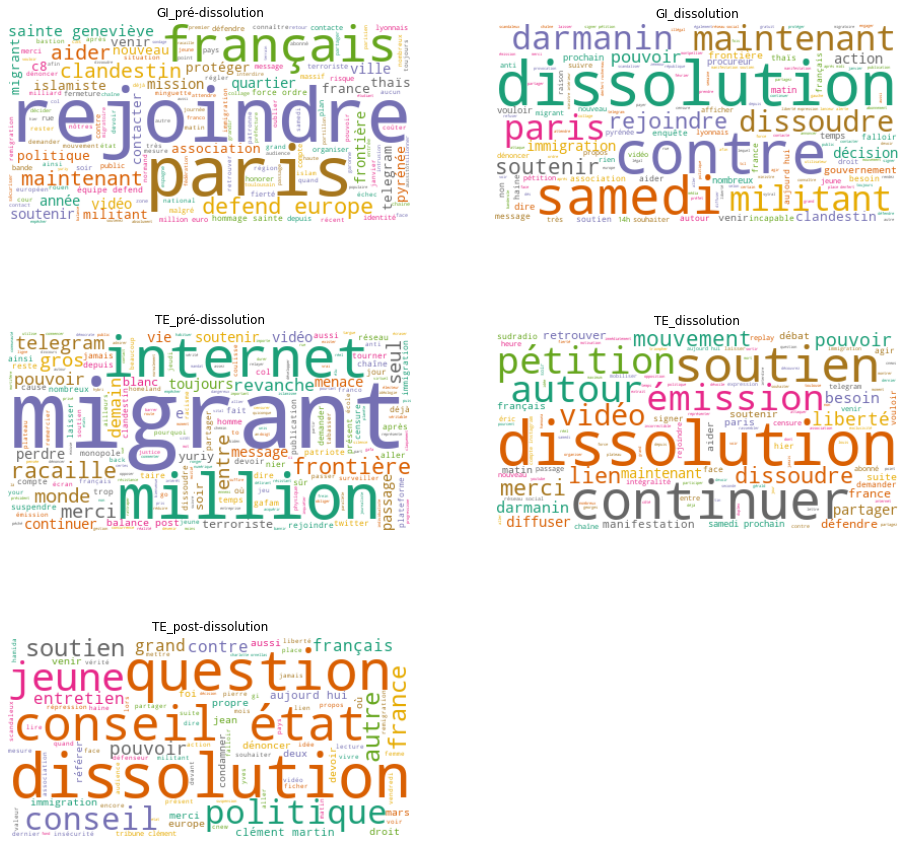

In [9]:
# Puis on visualise
%matplotlib inline
import matplotlib.pyplot as plt

corpus = pd.read_pickle('corpus.pkl')
temp_full = ['GI_pré-dissolution','GI_dissolution','TE_pré-dissolution', 'TE_dissolution', 'TE_post-dissolution']

plt.rcParams['figure.figsize'] = [16,16]

for index, temp in enumerate(data.columns):
    wc.generate(corpus.messages[temp])
    
    plt.subplot(3, 2, index +1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(temp_full[index], fontsize = 12)
    
plt.show()

In [29]:
# Pour enregistrer les wordclouds, on peut aussi les visualiser un par un
%matplotlib qt
import matplotlib.pyplot as plt

corpus = pd.read_pickle('corpus.pkl')
temp_full = ['GI_pré-dissolution','GI_dissolution','TE_pré-dissolution', 'TE_dissolution', 'TE_post-dissolution']

plt.rcParams['figure.figsize'] = [10,10]


wc.generate(corpus.messages['TE_post-dissolution'])
    
plt.subplot(1, 1, 1)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(temp_full[4], fontsize = 20)
    
plt.show()